In [1]:
import numpy as np
import math as ma
import matplotlib.pyplot as plt 
import os

In [2]:
# LU decomposition
def LU(A,n):
    L=np.zeros((n,n))
    U=np.identity(n) # Diagonal of U is all 1
    for i in range(0,n): # First column of L is A's
        L[i][0]=A[i][0]
    for j in range(1,n): # From assumption, we can obtain the first row of U
        U[0][j]=A[0][j]/L[0][0]
    for i in range(1,n):
        for j in range(1,i+1): # We can use the terms we have known to find other terms.
            s=0
            for k in range(0,j):
                s+=L[i][k]*U[k][j]
            L[i][j]=A[i][j]-s
        for j in range(i+1,n):
            s=0
            for k in range(0,j):
                s+=L[i][k]*U[k][j]
            U[i][j]=(A[i][j]-s)/L[i][i]
    return L,U,L@U

In [3]:
# Cholesky decomposition (positive-definite)
def LL(A,n):
    L=np.zeros((n,n))
    for j in range(0,n):
        s=0
        for k in range(0,j):
            s+=L[j][k]**2
        L[j][j]=ma.sqrt(A[j][j]-s)
        for i in range(j,n):
            s=0
            for k in range(0,j):
                s+=L[i][k]*L[j][k]
            L[i][j]=(A[i][j]-s)/L[j][j]
    return L,L@L.transpose()

In [4]:
def lin_eq(L,U,b,n): # LUx=b
    y=np.zeros((n,1)) # Ly=b, solve y
    x=np.zeros((n,1)) # Ux=y, solve x
    for i in range(0,n):
        s=0
        for j in range(0,i):
            s+=L[i][j]*y[j][0]
        y[i][0]=(b[i][0]-s)/L[i][i]
    for i in range(0,n):
        r=n-1
        s=0
        for j in range(0,i):
            s+=U[r-i][r-j]*x[r-j][0]
        x[r-i][0]=(y[r-i][0]-s)/U[r-i][r-i]
    return x

In [5]:
def Matrix_inverse(A,n):
    L,U,X=LU(A,n)
    A_inv=np.zeros((n,n))
    for i in range(0,n): # Use Ax=e_i for all i=1~n to obtain A^-1
        b=np.zeros((n,1))
        b[i][0]=1
        x=lin_eq(L,U,b,n)
        for j in range(0,n):
            A_inv[j][i]=x[j][0]
    return A_inv

In [6]:
def PD_Matrix_inverse(A,n): # positive-definite
    L,X=LL(A,n)
    A_inv=np.zeros((n,n))
    for i in range(0,n): # Use Ax=e_i for all i=1~n to obtain A^-1
        b=np.zeros((n,1))
        b[i][0]=1
        x=lin_eq(L,L.transpose(),b,n)
        for j in range(0,n):
            A_inv[j][i]=x[j][0]
    return A_inv

In [20]:
def print_line_and_error(coef):
    print('Fitting line:',end = '')
    for i in range(n):
        if i>0 and coef[i][0]>0:
            print('+',end = '')
        print(coef[i][0],end = '')
        if i<n-1:
            print('x^',end = '')
            print(n-1-i,end = '')
    print('')
    Err=(A@coef-b).transpose()@(A@coef-b)
    print('Total error:',Err[0][0])

In [12]:
def polynomial_coefficients(x,coeffs,order):
    y=np.zeros(len(x))
    for i in range(order):
        y+=coeffs[i][0]*x**(order-1-i)
    return y

In [26]:
def print_graph(coef):
    xs=np.linspace(x.min()-1,x.max()+1,100)
    plt.axhline(y=0,color='k')
    plt.axvline(x=0,color='k')
    plt.plot(xs,polynomial_coefficients(xs,coef,n))
    plt.scatter(x,b,color='r')
    plt.xlim([x.min()-1,x.max()+1])
    plt.show()

The dimension of polynomial:3
Scalar of L2 norm (RLSE):10000
LSE:
Fitting line:0.8345332827002858x^2+0.09314819831918822x^1+0.04695069927346927
Total error: 22649.73849302415

Newton's Method:
Fitting line:3.0238533934865712x^2+4.906190263863798x^1-0.2314017560877098
Total error: 26.559959499333043


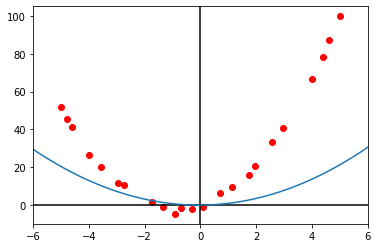

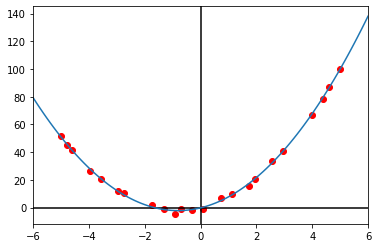

In [29]:
x=[]
b=[]
m=0
f=open('textfile.txt','r',encoding='utf-8')
line=f.readline()
while line:
    m+=1
    xi,yi=line.split(',')
    x.append(float(xi))
    b.append(float(yi))
    line=f.readline()
x=np.asarray(x,dtype='float').reshape((-1,1))
b=np.asarray(b,dtype='float').reshape((-1,1))
n=int(input('The dimension of polynomial:'))
lamb=int(input('Scalar of L2 norm (RLSE):'))
A=np.zeros((m,n))
for i in range(0,m):
    for j in range(0,n):
        A[i][n-1-j]=x[i][0]**j
if lamb>0:
    coef1=PD_Matrix_inverse(A.transpose()@A+lamb*np.identity(n),n)@A.transpose()@b # RLSE & positive-definite
else:
    coef1=Matrix_inverse(A.transpose()@A+lamb*np.identity(n),n)@A.transpose()@b # RLSE
coef2=-Matrix_inverse(2*A.transpose()@A,n)@(-2*A.transpose()@b) # Newton's method
print('LSE:')
print_line_and_error(coef1)
print('')
print('Newton\'s Method:')
print_line_and_error(coef2)
print_graph(coef1)
print_graph(coef2)